## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [References](#references)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv', parse_dates = ['timestamp'], infer_datetime_format = True, memory_map = True)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df.index)

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df.query('(group == "treatment" and landing_page != "new_page") or \
              (group == "control" and landing_page != "old_page")'))

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null datetime64[ns]
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or \
                        (group == "control" and landing_page != "old_page")').index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.loc[df2['user_id'].duplicated()]['user_id'].values[0]

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.loc[df2['user_id'].isin(df2.loc[df2['user_id'].duplicated()]['user_id'].values)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates('user_id', inplace=True)

In [14]:
df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
overall_convertion_rate = df2['converted'].mean()
overall_convertion_rate

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
len(df2.query('landing_page == "new_page"')) / len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [19]:
df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()

-0.0015782389853555567

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">
There is not sufficient evidence to say that the new page leads to more conversions. This is because we're only looking at a sample (a statistic) and not the population. But we are interested in making a prediction of a parameter of the whole polution.
<br><br>
In addition if one looks on these raw numbers the probability that the new treatment page leads to more conversions is even lower than for the old page.
</div>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">
Given the assumption that the old page is better unless the new page proves to be better I define the null hypotheses as
<br/><br/>
$H_{0}$: $p_{new}$ $\leq$ $p_{old}$ 
<br/><br/>
and the alternative as 
<br/><br/>
$H_{1}$: $p_{new}$ $\gt$ $p_{old}$
<br/><br/>
or
<br/><br/>
$H_{0}$: $p_{new}$ - $p_{old}$ $\leq$ 0 
<br/><br/>
agains 
<br/><br/>
$H_{1}$: $p_{new}$ - $p_{old}$ $\gt$ 0
<br/><br/>
Given that Type I errors are when the new page is choosen as better but the old one is in reality better than the new one.
</div>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">
Just to clarify my understanding:


- We do a one-tailed significance test. (Test whether convertion rate of $H_{1}$ is larger than $H_{0}$)
- We start by setting the **converted rate** of both hypothesis as equal because we start by the nearest value under the null. That is both are equal.

Correct?
</div>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
cr_p_new = overall_convertion_rate
cr_p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
cr_p_old = cr_p_new
cr_p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
new_pages = df2.query('landing_page == "new_page"')
n_new_size = len(new_pages.index)
n_new_size

145310

d. What is $n_{old}$?

In [23]:
old_pages = df2.query('landing_page == "old_page"')
n_old_size = len(old_pages.index)
n_old_size

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

- As we are only interested in two values (**[0, 1]**) for simulating **convertion rate** I can use **np.random.choice** like when simulating biased coin flips.
- Although **cr_p_new** and **cr_p_old** are both equal to **overall_convertion_rate** I'll use them to make the distinction clearer.
- Only the size of the array varies according to the size in the cleaned dataframe **df2**.

</div>

In [24]:
new_page_converted = np.random.choice([0,1], size = n_new_size, p = [1 - cr_p_new, cr_p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0,1], size = n_old_size, p = [1 - cr_p_old, cr_p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.0002801167145539962

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

- For these 10000 samplings (bootstraping) I do not need to resample from **df2** because I now the probability and the sizes of the groups. I can just use **np.random.choice** two times in 10000 iterations.
- This is way faster than using **df2.sample** and **np.random.binomial**. 

</div>

In [27]:
p_diffs = []
for _ in range(10000):
    old_p_cr = np.random.choice([0,1], size = n_old_size, p = [1 - cr_p_old, cr_p_old])
    new_p_cr = np.random.choice([0,1], size = n_new_size, p = [1 - cr_p_new, cr_p_new])
    p_diffs.append(new_p_cr.mean() - old_p_cr.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

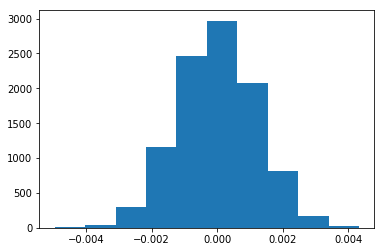

In [28]:
plt.hist(p_diffs);

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

I computed the sampling distribution (the _spread_ of the data) in the difference of the propabilities of the conversion rate of two test groups under the hypothesis that the conversion rate is equal in both groups.

</div>

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
p_diffs = np.array(p_diffs)
obs_diff = df2.query('landing_page == "new_page"')['converted'].mean() - \
           df2.query('landing_page == "old_page"')['converted'].mean()
p_value = (p_diffs > obs_diff).mean()
p_value

0.9061

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

In part **j.** I calculated the propability that a difference in the number of average users converted between the two test groups is not due to pure coincidence. This is called the **p-value.** As there is no mathematical instrument to prove that a hypothesis is true or false the p-value helps showing whether a hypothesis is consistent with the data analyzed.

In terms of whether there is a difference between the new and old pages we need to use this **p-value** and the **Type I error rate** $\alpha$ given above. This is **5% or 0.05**. As the **p-value** calculated above is larger than this __we fail to reject the null hypothesis__. There is no evidence given by the statistic calculated that the new page leads to more conversions.

</div>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" and converted == 1').index)
convert_new = len(df2.query('landing_page == "new_page" and converted == 1').index)
n_old = len(df2.query('landing_page == "old_page"').index)
n_new = len(df2.query('landing_page == "new_page"').index)
convert_old, n_old, convert_new, n_new

(17489, 145274, 17264, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
from scipy.stats import norm
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value, norm.ppf(1-(0.05/2))

(-1.3109241984234394, 0.9050583127590245, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

The p-value calculated by statsmodels approximately matches the value calculated in **j.** In addition according to the link provided above the z-score is not significant in our significance level of 95% because it falls within the range implied by the critical value of 1.96. 

So in terme of the conversion rates between these two pages we fail to reject the null hypothesis. There is no evidence given by the statistic calculated that the new page leads to more conversions as before.

</div>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

As we want to predict a categorical response variable that has only two outcomes I use **Logistic Regression.**

</div>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:10:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

- The p-value associated with **ab_page** is **0.190** which is different from the p-value calculated above.
- Again the p-value indicates that there is not significant influence on convertions between the two pages.
- These values are different because in **Part II** I calculated the p-value for a one-tail test. The Logistic Regression model calculates a two-tail value. Hence the Hypothesis are different. I think the regression model calculates "for every increase in showing the new page how likely will the user convert or not."

Part II tested: **$H_{0}$: $p_{new}$ $\leq$ $p_{old}$** against **$H_{1}$: $p_{new}$ $\gt$ $p_{old}$**

The regression tested: **$H_{0}$: $p_{new}$ $=$ $p_{old}$** against **$H_{1}$: $p_{new}$ $\neq$ $p_{old}$**

</div>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

One column that might influence convertion rate might be the timestamp. It would be possible to check whether different time of the day influences whether a user converts.

In addition it would be possible to convert the timestamp column into categorical columns like "Morning", "Afternoon", "Evening", "Night" or "Weekday", "Weekend" and so on.

It might be a good idea to include other factors to be able to customize the page depending on factors like the Time. 

Disadvantages are that more and more terms in a regression model not only complicates the model but the interpretation of the results. In addition it must be ensured that the variables are not correlated with one another (multicollinearity).

</div>

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

Let's see wether a user more likely converts on weekends.

The column **timestamp** was already converted to a datetime64 on import. I can use a lambda to check the [weekday](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Timestamp.weekday.html#pandas.Timestamp.weekday) number and due to boolean evaluation return **True (1)** or **False (0)** for a given weekday. I'll add to columns for the name of the weekday and whether it is a Weekday or Weekend.

**By the way:** What can I do to speed up this lambda expression?

</div>

In [35]:
# create a new dataframe - this seems to be cleaner
df_wdays = pd.concat([df2, df2['timestamp'].apply(lambda x: pd.Series([x.day_name(), 1 if x.weekday() > 4 else 0]))], axis = 1)
df_wdays.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,0,1
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,Saturday,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,Thursday,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,Wednesday,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,Sunday,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,Saturday,1


In [36]:
df_wdays.rename(columns = {0 : 'day_name', 1 : 'weekend'}, inplace = True)
df_wdays.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,day_name,weekend
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,Saturday,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,Thursday,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,Wednesday,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,Sunday,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,Saturday,1


In [37]:
wend_lm = sm.Logit(df_wdays['converted'], df_wdays[['intercept', 'weekend']])
wend_res = wend_lm.fit()
wend_res.summary()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:               1.227e-08
Time:                        11:11:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.9593
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9964      0.007   -297.555      0.000      -2.010      -1.983
weekend        0.0007      0.013      0.051      0.959      -0.024       0.026
==============================================================================
"""

In [38]:
np.exp(wend_res.params)

intercept    0.135819
weekend      1.000655
dtype: float64

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

**Conclusion:**

As the p-value of **weekend** is very large users seem not to convert more likely on weekends.

Let's go a step further and create dummy columns for weekdays and use **Monday** as baseline for the model.

</div>

In [39]:
df_wdays = pd.concat([df_wdays, pd.get_dummies(df_wdays['day_name'])], axis=1)
df_wdays.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,day_name,weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,Saturday,1,0,0,1,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,Thursday,0,0,0,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,Wednesday,0,0,0,0,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,Sunday,1,0,0,0,1,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,Saturday,1,0,0,1,0,0,0,0


In [40]:
wday_lm = sm.Logit(df_wdays['converted'], df_wdays[['intercept', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']])
wday_res = wday_lm.fit()
wday_res.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:               2.601e-05
Time:                        11:11:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.4774
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9816      0.014   -137.832      0.000      -2.010      -1.953
Tuesday       -0.0152      0.020     -0.753      0.452      -0.055       0.024
Wednesday     -0.0077      0.021     -0.364      0.716      -0.049       0.034
Thursday      -0.0112      0.021     -0.529      0.597      -0.053       0.030
Friday        -0.0425      0.021     -2.002      0.045      -0.084      -0.001
Saturday      -0.0030      0.021     -0.145      0.885      -0.044       0.038
Sunday        -0.0253      0.021     -1.199      0.231      -0.067       0.016
==============================================================================
"""

In [41]:
np.exp(wday_res.params)

intercept    0.137849
Tuesday      0.984904
Wednesday    0.992351
Thursday     0.988862
Friday       0.958344
Saturday     0.996959
Sunday       0.974980
dtype: float64

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

**Conclusion:**

Again all p-values suggest that the day of the week is not likely to influence whether a user converts.

Let's see how long the test was run:

</div>

In [42]:
df_wdays['timestamp'].max() - df_wdays['timestamp'].min()

Timedelta('21 days 23:59:49.081927')

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

The test ran for about 22 days. Perhaps this was to short for getting a significant difference (in either direction) between these two pages.

</div>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')

In [44]:
### Create the necessary dummy variables
df_new = pd.concat([df_new, pd.get_dummies(df_new['country'])], axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [45]:
country_lm = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
result = country_lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:               1.521e-05
Time:                        11:11:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [46]:
np.exp(result.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

**Conclusion:**

The p-values indicate that none of the statistics is statistically significant for a increase in conversions. And this small difference between these three countries would be practically insignificant as well. 

</div>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
### Fit Your Linear Model And Obtain the Results

# create a new column for every country and page
df_new['CAPages'] = df_new['CA'] * df_new['ab_page']
df_new['UKPages'] = df_new['UK'] * df_new['ab_page']
df_new['USPages'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CAPages,UKPages,USPages
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [48]:
contry_pages_lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'USPages', 'UK', 'UKPages']])
contry_pages_result = contry_pages_lm.fit()
contry_pages_result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:               3.482e-05
Time:                        11:11:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
USPages        0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
UKPages        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

In [49]:
np.exp(contry_pages_result.params)

intercept    0.134794
ab_page      0.934776
US           1.017682
USPages      1.048001
UK           1.011854
UKPages      1.081428
dtype: float64

<div style="background-color: #f5fcf5; padding: 10px; border: solid 1.5px #d5f5d5;">

**Conclusion:**

Again if we look at the p-values none of the variables is statistically significant to influence conversions. 

</div>

<a id='references'></a>
## References

During this project I used these websides: 

- https://splitmetrics.com/blog/determining-sample-size-for-a-b-tests/
- https://conversionxl.com/blog/visualize-ab-test-results/
- https://de.khanacademy.org/math/linear-algebra
- http://scikit-learn.org/stable/index.html
- https://stattrek.com/tutorials/regression-tutorial.aspx
- http://www.statisticshowto.com/probability-and-statistics/regression-analysis/
- http://www.statsmodels.org/stable/index.html
- http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-why-we-need-to-use-hypothesis-tests-in-statistics
- http://www.juanshishido.com/logisticcoefficients.html

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.